In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

# Add the script's directory to the Python path
sys.path.append(r'D:\Projects\Python\bank-app-reviews-analysis\src\analysis')

# Verify the path
print("Python path:", sys.path)

# Import and reload the module to ensure latest version
try:
    import analyze_reviews_from_db
    importlib.reload(analyze_reviews_from_db)
    print("Module attributes:", dir(analyze_reviews_from_db))
except ImportError as e:
    print(f"ImportError: {e}")
    raise

# Ensure output directory exists
os.makedirs("outputs", exist_ok=True)

Python path: ['C:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python310', 'd:\\Projects\\Python\\bank-app-reviews-analysis\\.venv', '', 'd:\\Projects\\Python\\bank-app-reviews-analysis\\.venv\\lib\\site-packages', 'd:\\Projects\\Python\\bank-app-reviews-analysis\\.venv\\lib\\site-packages\\win32', 'd:\\Projects\\Python\\bank-app-reviews-analysis\\.venv\\lib\\site-packages\\win32\\lib', 'd:\\Projects\\Python\\bank-app-reviews-analysis\\.venv\\lib\\site-packages\\Pythonwin', '../src/analysis', 'D:\\Projects\\Python\\bank-app-reviews-analysis\\src\\analysis', 'D:\\Projects\\Python\\bank-app-reviews-analysis\\src\\analysis', 'D:\\Projects\\Python\\bank-app-reviews-analysis\\src\\analysis', 'D:\\Projects\\Python\\bank-app-reviews-analysis\\src\\analysis']
Module attributes: ['Coun

In [41]:
print("📥 Loading data...")
try:
    df = analyze_reviews_from_db.load_data()
    if df.empty:
        print("⚠️ No data loaded. Exiting.")
    else:
        display(df.head())
except AttributeError as e:
    print(f"AttributeError: {e}. Check if 'load_data' exists in analyze_reviews_from_db.py")
    raise

📥 Loading data...


REVIEW_ID  \
0  c1698da217f8f1f69ec3f269f2adaed3   
1  07bec0f87319f8e9e6541da2883b2916   
2  77db45e9bb9e610a42cd16c8560ce6fd   
3  2c15634273c8f9922f7a870ce877a8fc   
4  e8efe612c2b176fef3efdcf7955e2a9d   

                                              REVIEW  RATING REVIEW_DATE  \
0  "Why don’t your ATMs support account-to-accoun...       4  2025-06-06   
1                        what is this app problem???       1  2025-06-05   
2       the app is proactive and a good connections.       5  2025-06-05   
3    I cannot send to cbebirr app. through this app.       3  2025-06-05   
4                                     not functional       1  2025-06-05   

                     BANK_NAME       SOURCE  
0  Commercial Bank of Ethiopia  Google Play  
1  Commercial Bank of Ethiopia  Google Play  
2  Commercial Bank of Ethiopia  Google Play  
3  Commercial Bank of Ethiopia  Google Play  
4  Commercial Bank of Ethiopia  Google Play

In [42]:
print("🔄 Processing data...")
df = analyze_reviews_from_db.process_data(df)
if not df.empty:
    display(df.head())

🔄 Processing data...


review_id  \
0  c1698da217f8f1f69ec3f269f2adaed3   
1  07bec0f87319f8e9e6541da2883b2916   
2  77db45e9bb9e610a42cd16c8560ce6fd   
3  2c15634273c8f9922f7a870ce877a8fc   
4  e8efe612c2b176fef3efdcf7955e2a9d   

                                              review  rating review_date  \
0  "Why don’t your ATMs support account-to-accoun...       4  2025-06-06   
1                        what is this app problem???       1  2025-06-05   
2       the app is proactive and a good connections.       5  2025-06-05   
3    I cannot send to cbebirr app. through this app.       3  2025-06-05   
4                                     not functional       1  2025-06-05   

                     bank_name       source sentiment_rating sentiment_text  
0  Commercial Bank of Ethiopia  Google Play         positive       positive  
1  Commercial Bank of Ethiopia  Google Play         negative       negative  
2  Commercial Bank of Ethiopia  Google Play         positive       positive  
3  Commercial Bank of Ethiopia  Google Play          neutral        neutral  
4  Commercial Bank of Ethiopia  Google Play         negative        neutral

In [43]:
print("📉 Checking for bias...")
bias_report = analyze_reviews_from_db.check_bias(df)
print(bias_report)

📉 Checking for bias...

📉 Sentiment Bias Check:
Positive: 62.70%
Neutral: 6.01%
Negative: 31.29%



📊 Generating visualizations...


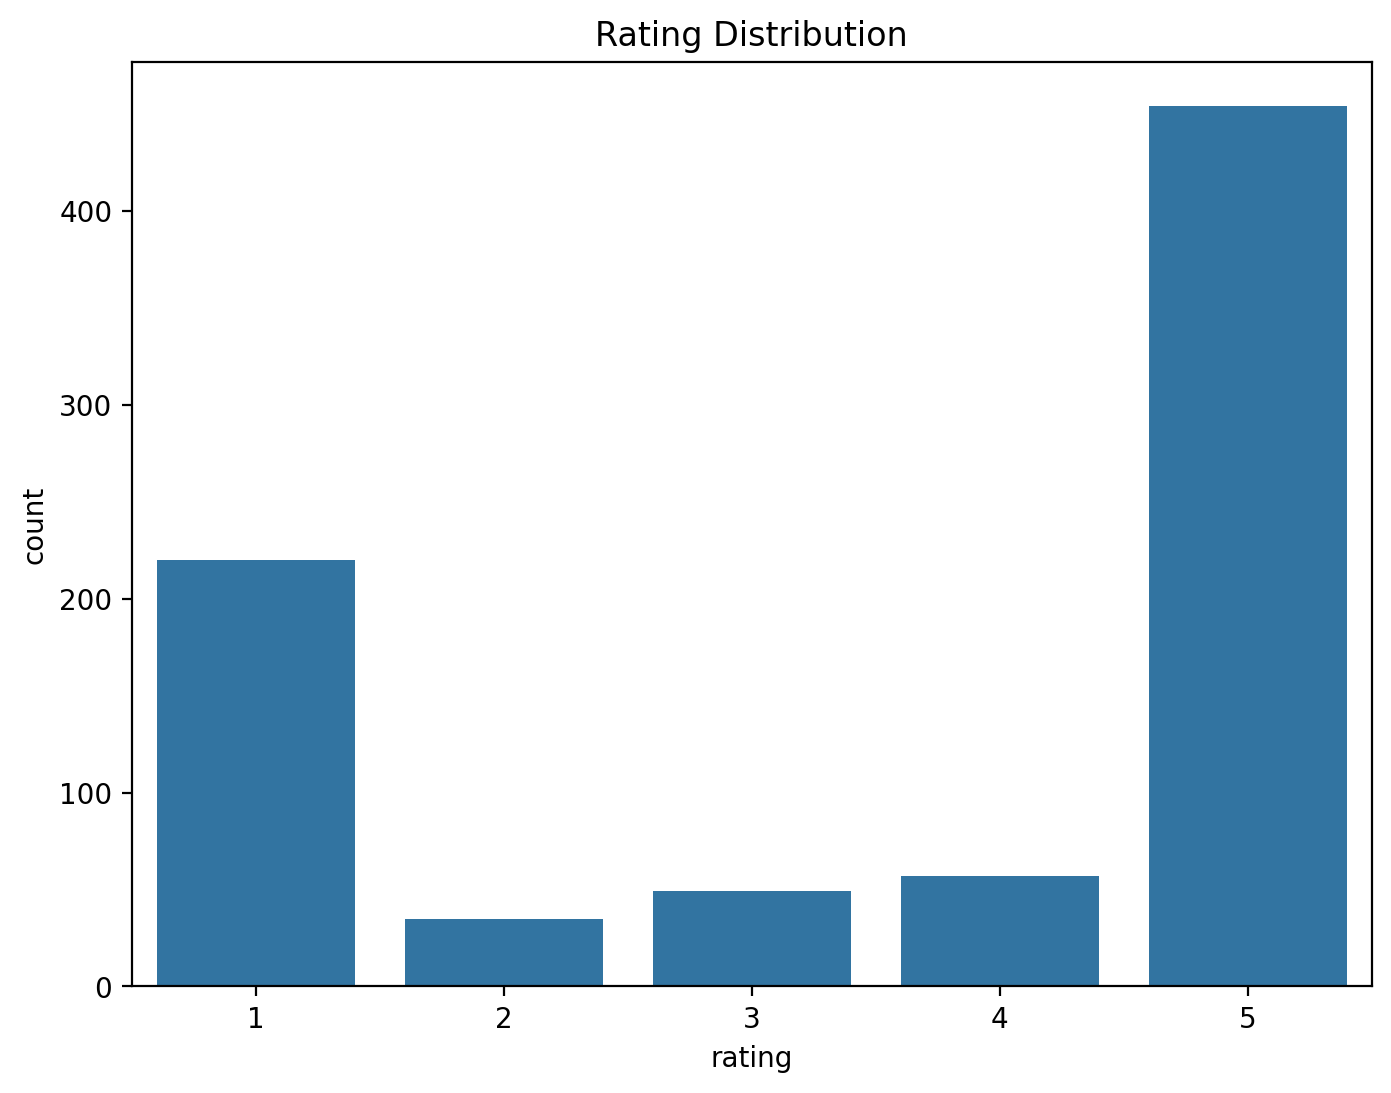

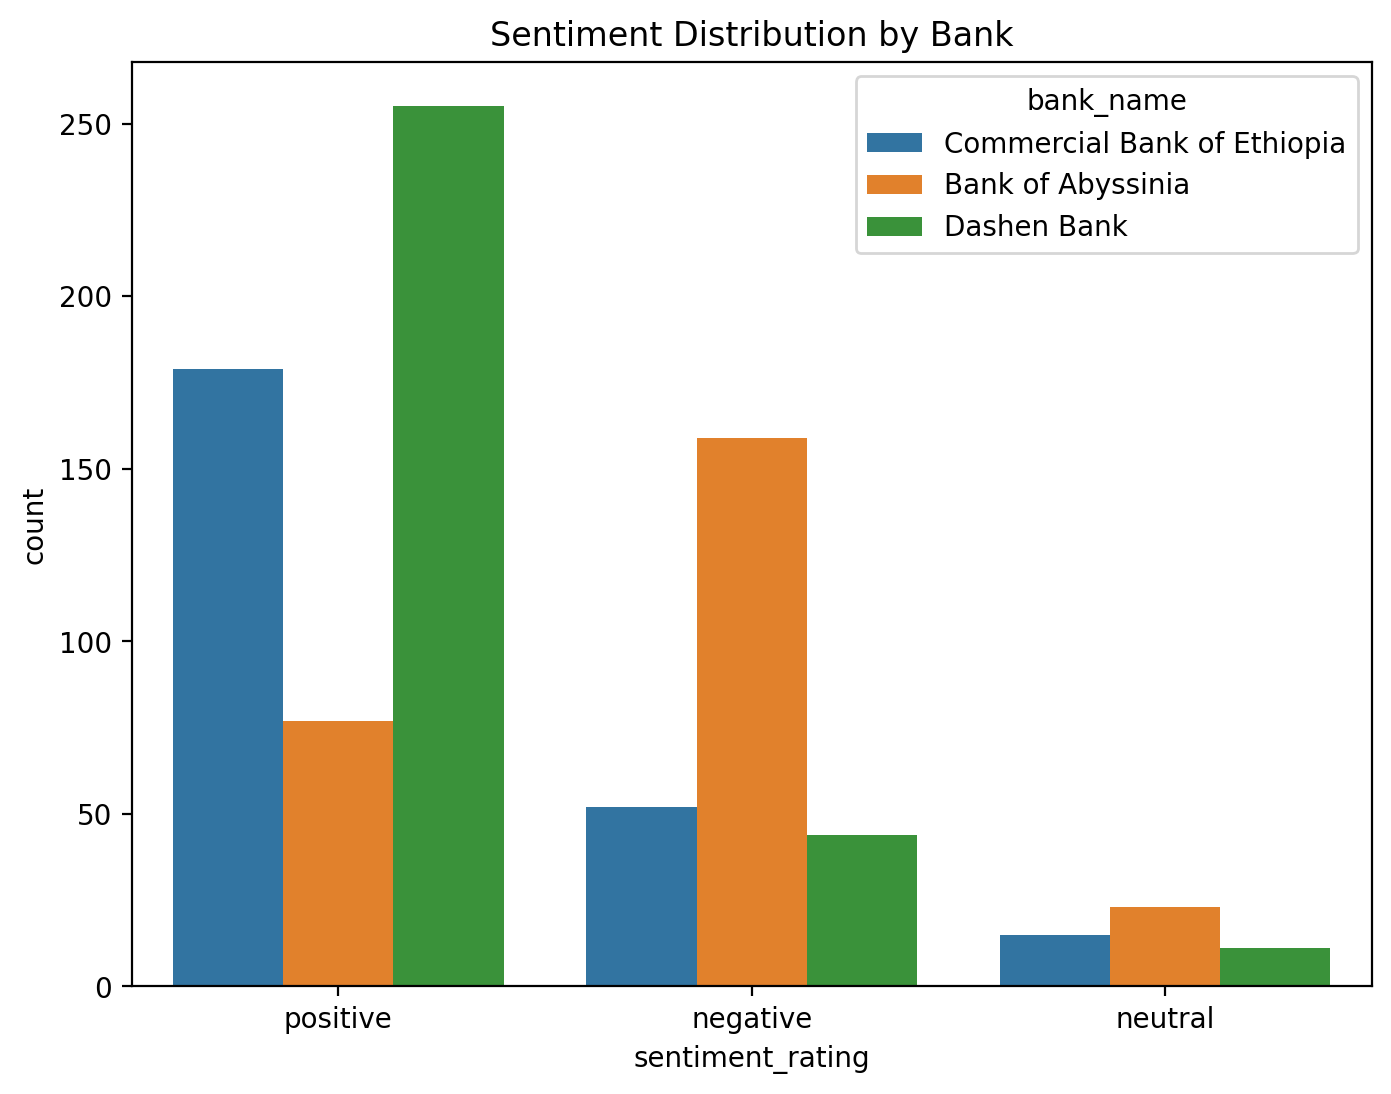

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

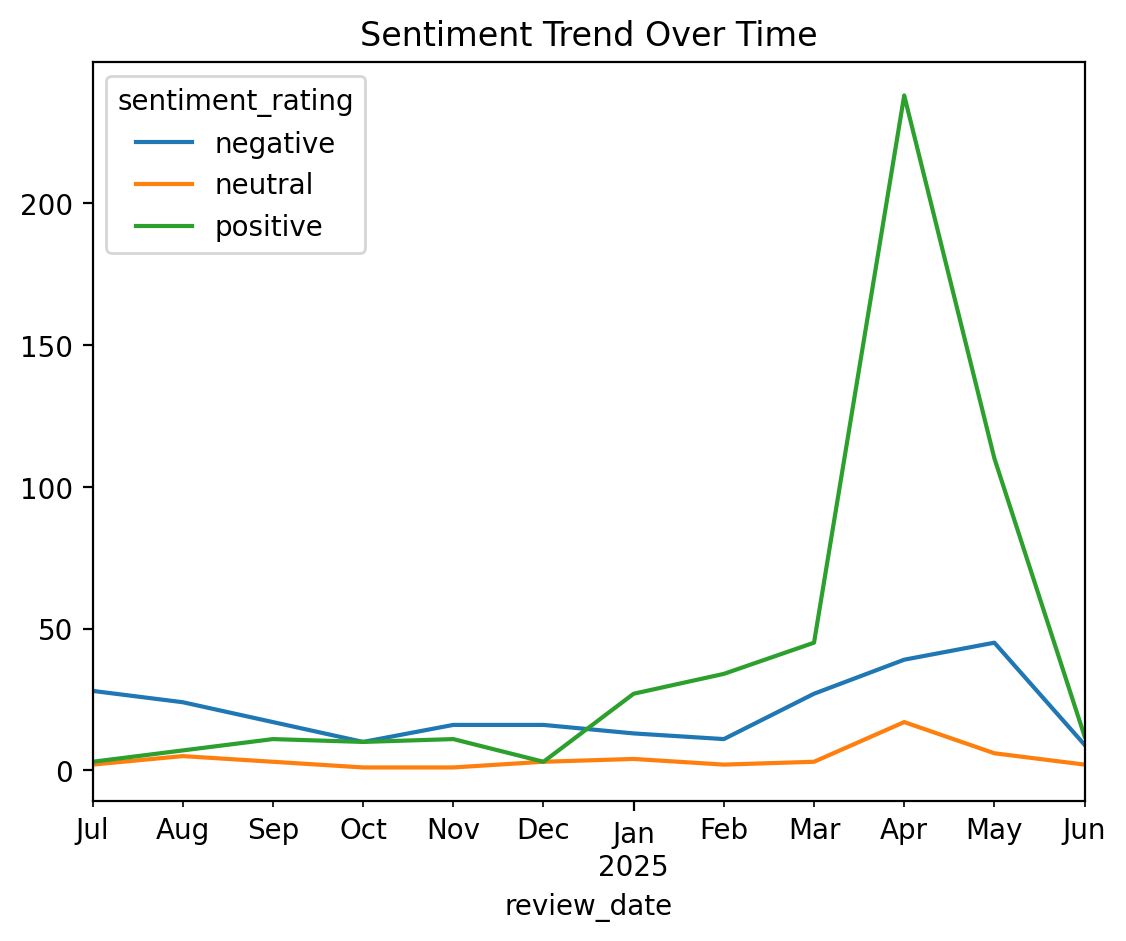

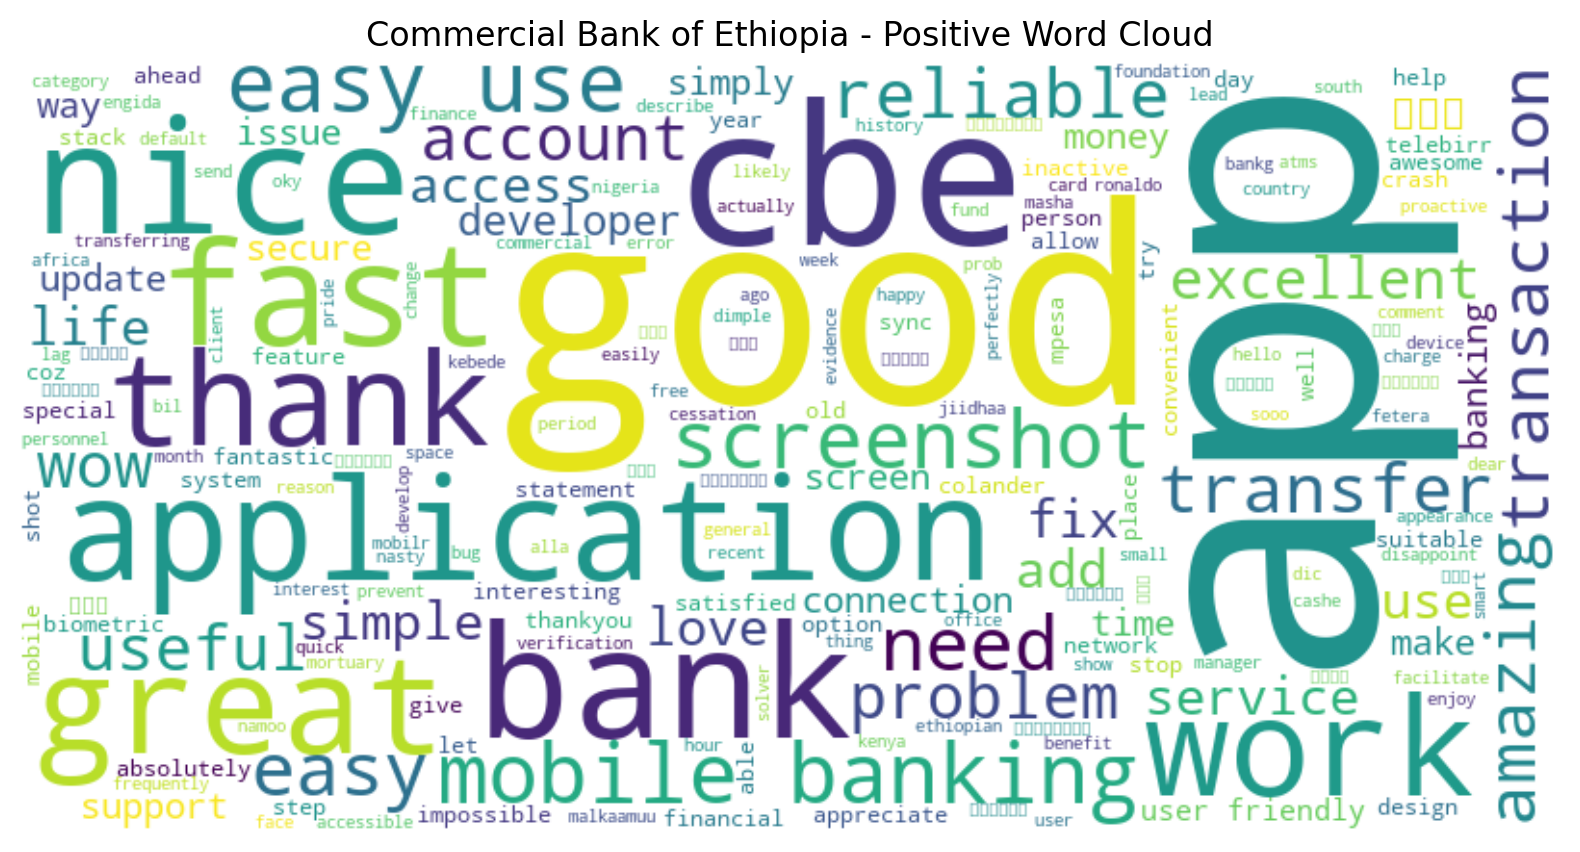

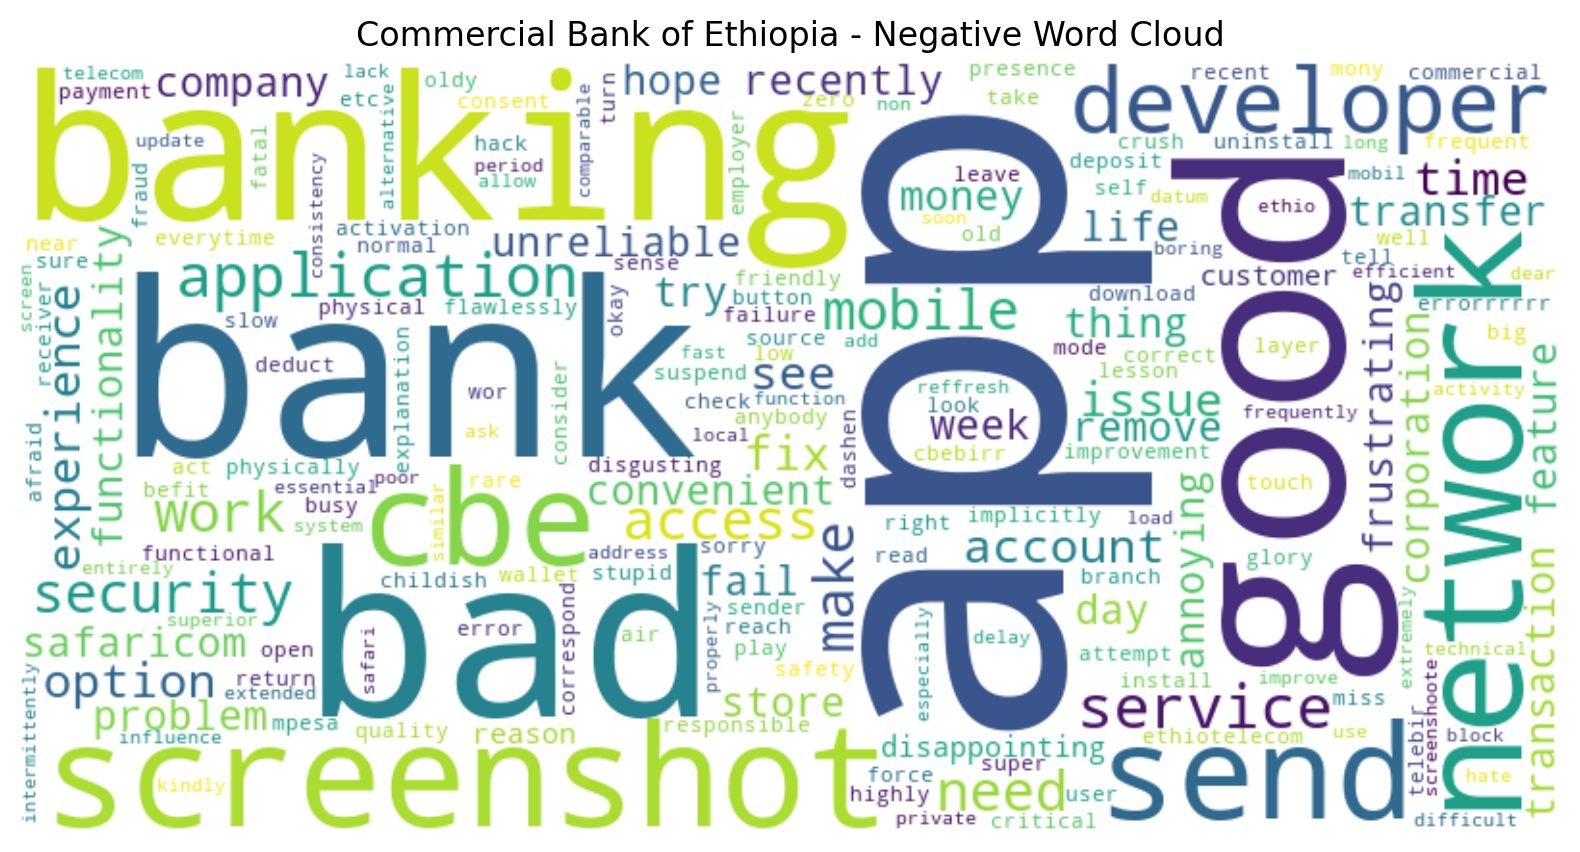

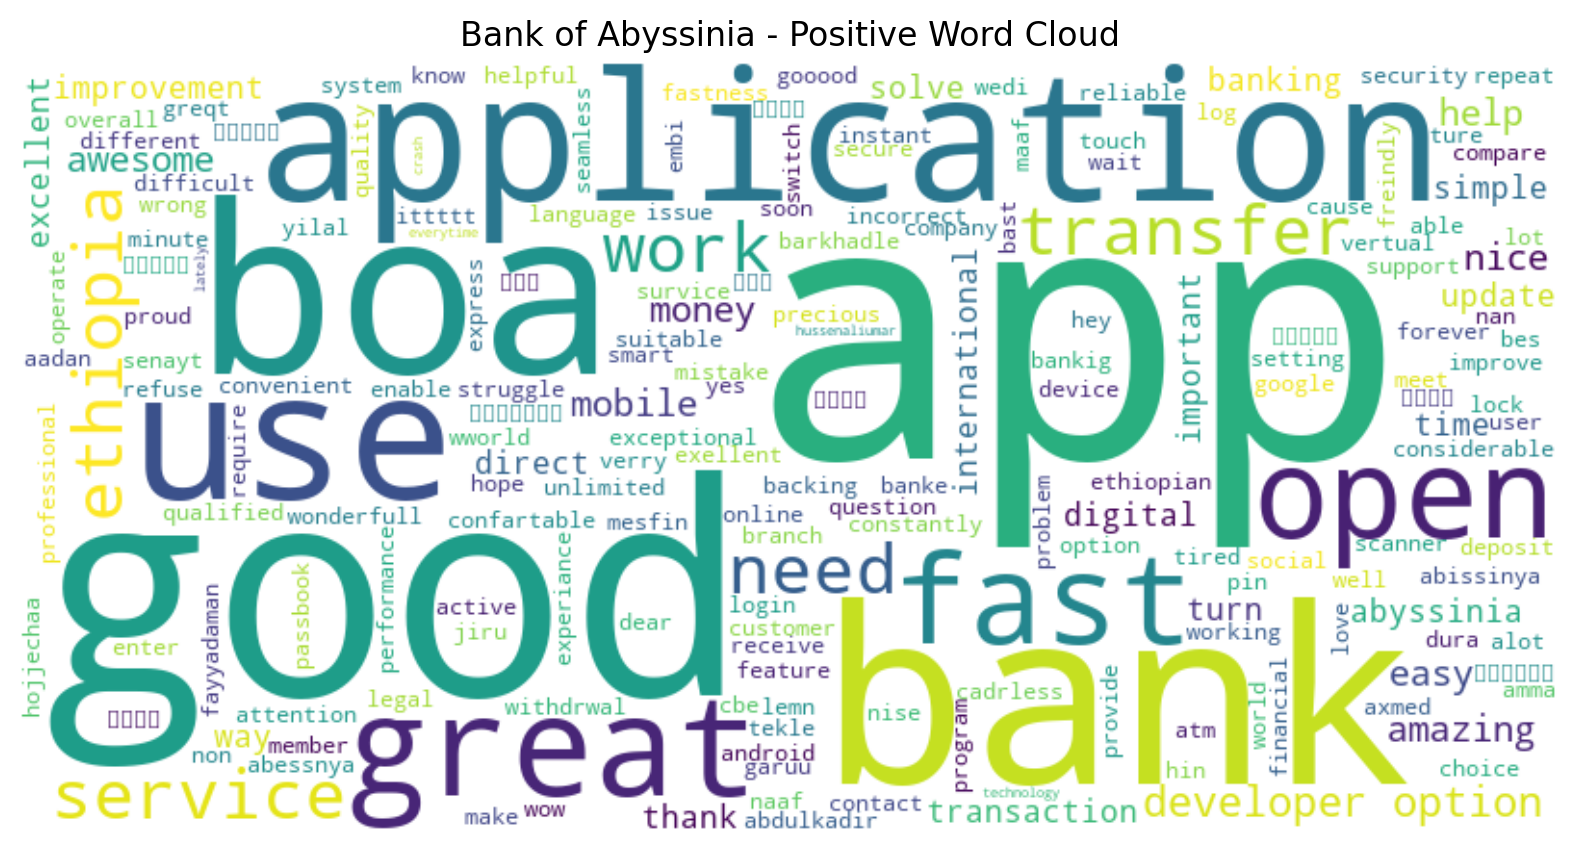

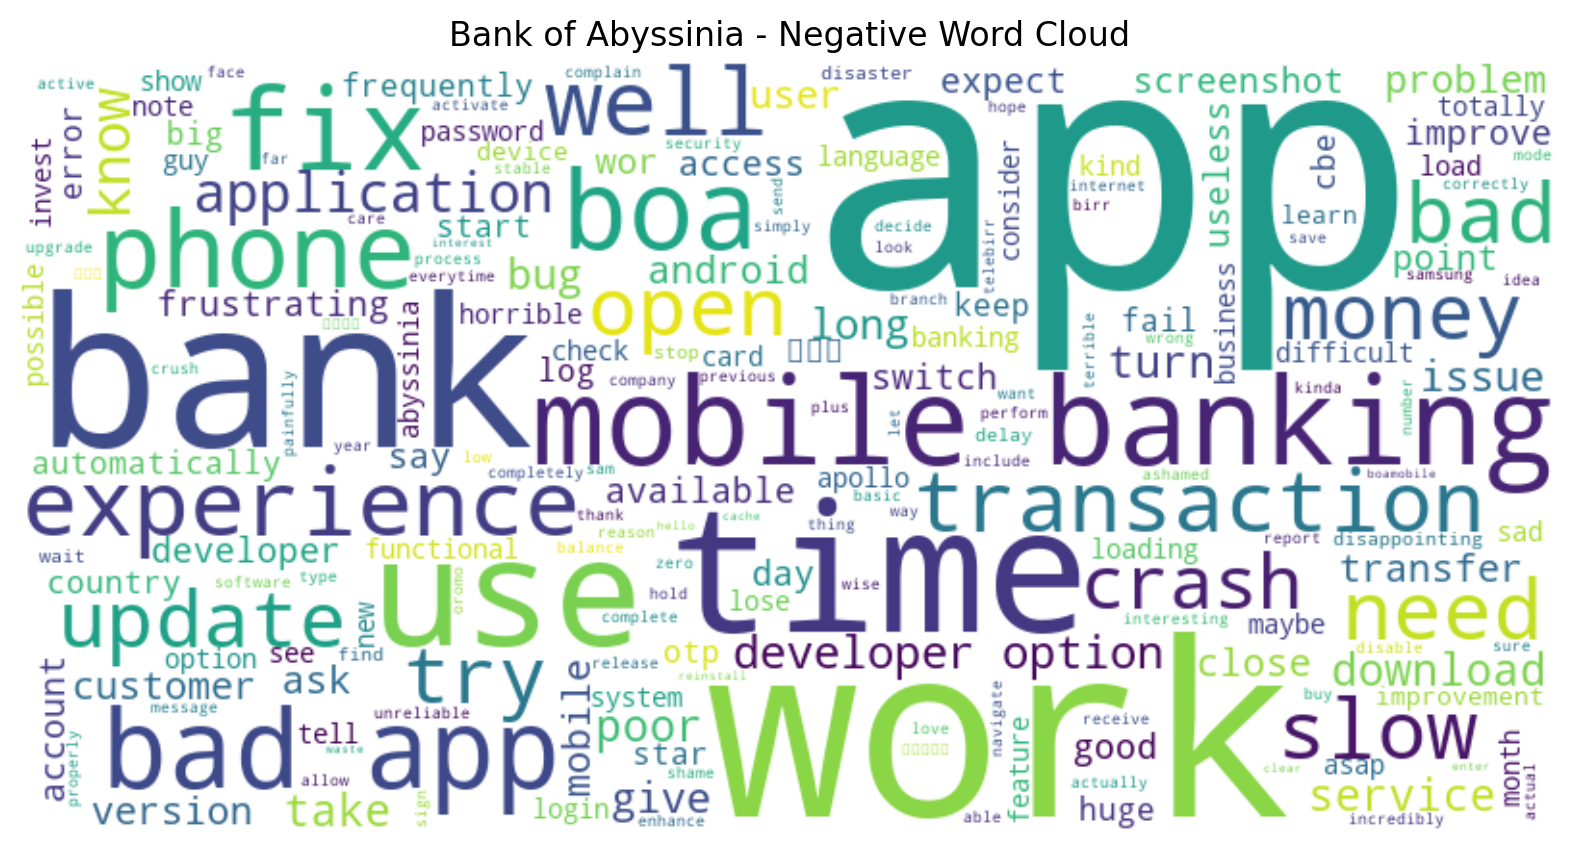

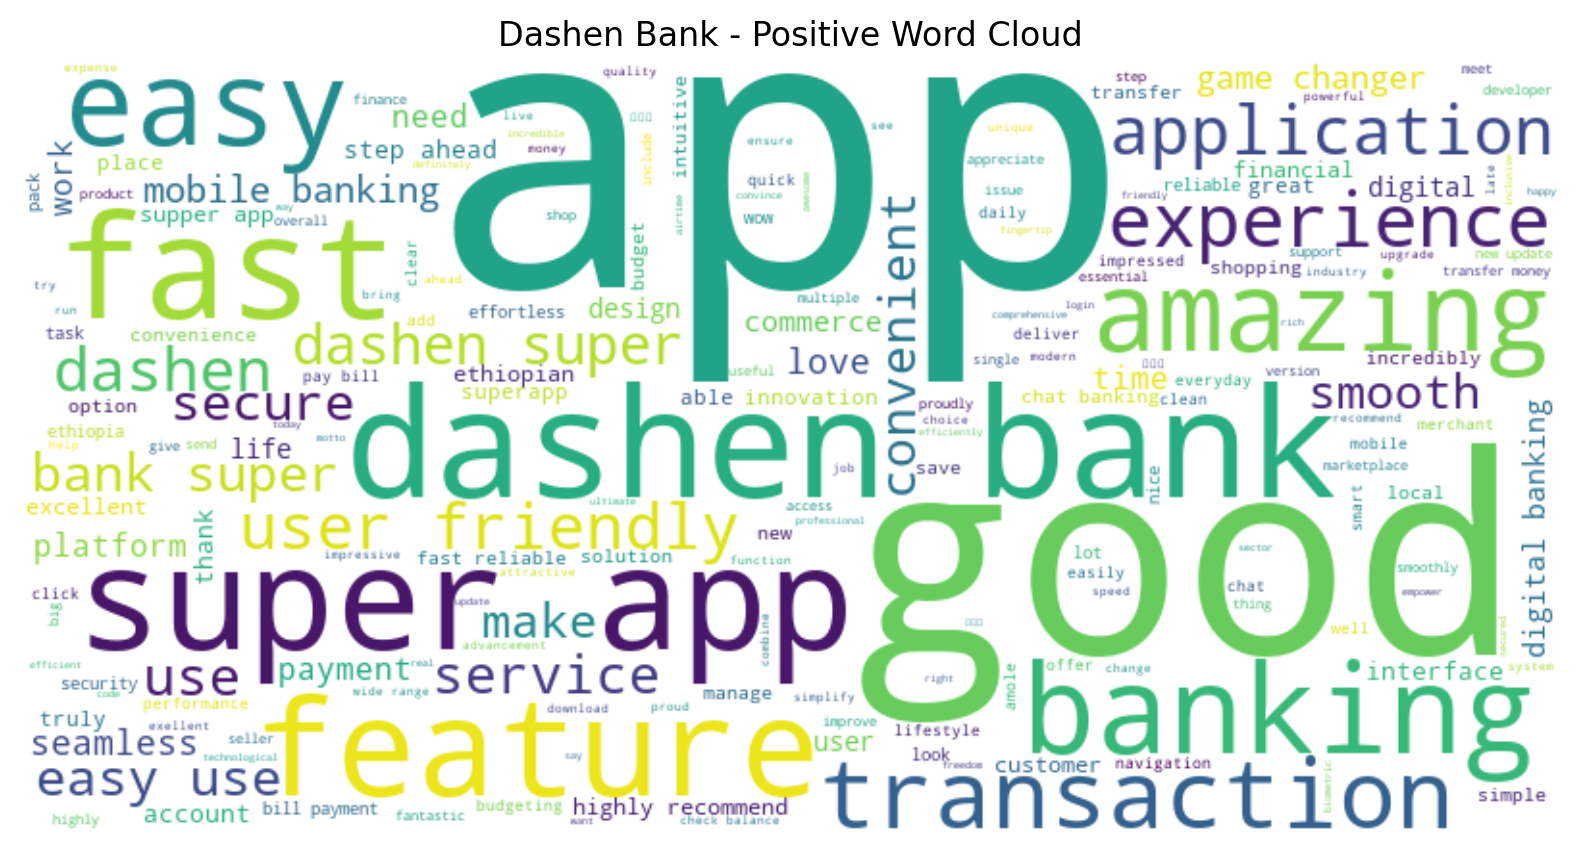

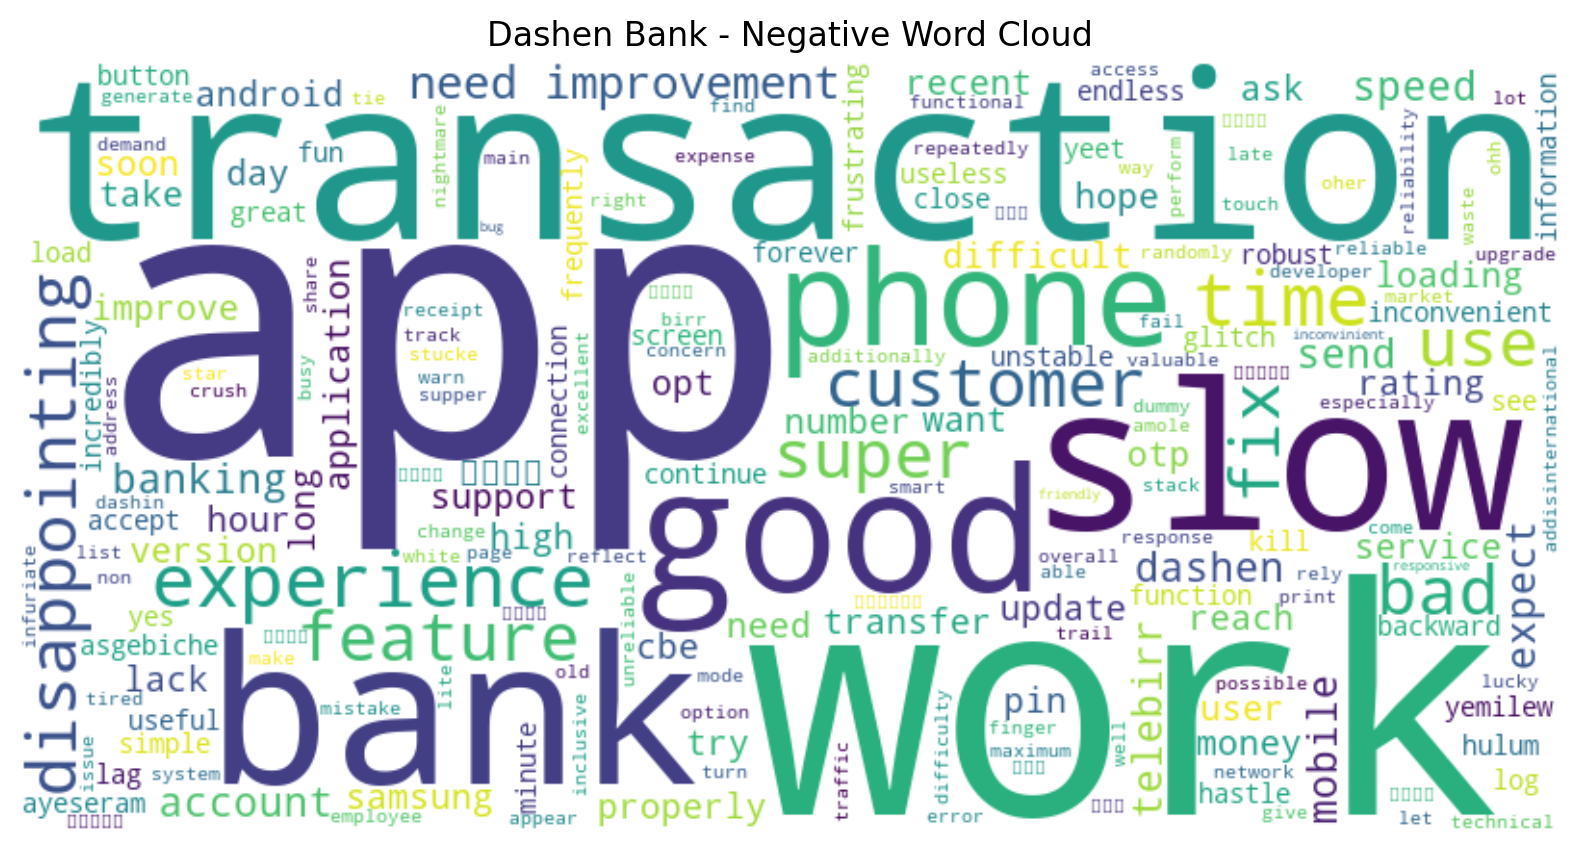

In [44]:
print("📊 Generating visualizations...")

# Rating Distribution
analyze_reviews_from_db.plot_rating_distribution(df)
if not df.empty:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='rating')
    plt.title("Rating Distribution")
    plt.show()
    plt.close()

# Sentiment Distribution
analyze_reviews_from_db.plot_sentiment_distribution(df)
if not df.empty:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='sentiment_rating', hue='bank_name')
    plt.title("Sentiment Distribution by Bank")
    plt.show()
    plt.close()

# Sentiment Trend
analyze_reviews_from_db.plot_sentiment_trend(df)
if not df.empty:
    plt.figure(figsize=(10, 6))
    df.groupby([df['review_date'].dt.to_period('M'), 'sentiment_rating']).size().unstack().plot()
    plt.title("Sentiment Trend Over Time")
    plt.show()
    plt.close()

# Word Clouds
for bank in df['bank_name'].unique():
    for sentiment in ['positive', 'negative']:
        analyze_reviews_from_db.generate_wordcloud(df, bank, sentiment)
        if not df.empty:
            reviews = df[(df['bank_name'] == bank) & (df['sentiment_rating'] == sentiment)]['review'].dropna()
            if not reviews.empty:
                tokens = [word for review in reviews for word in analyze_reviews_from_db.clean_and_tokenize(review)]
                if tokens:
                    wordcloud = analyze_reviews_from_db.WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))
                    plt.figure(figsize=(10, 5))
                    plt.imshow(wordcloud, interpolation='bilinear')
                    plt.axis('off')
                    plt.title(f"{bank} - {sentiment.capitalize()} Word Cloud")
                    plt.show()
                    plt.close()

In [45]:
print("🧠 Analyzing insights...")
insights = analyze_reviews_from_db.summarize_insights(df)

print("\n📌 Key Drivers and Pain Points:")
for bank, items in insights.items():
    print(f"\n🏦 {bank}")
    print("✅ Drivers:", [word for word, _ in items['drivers']])
    print("⚠️ Pain Points:", [word for word, _ in items['pain_points']])

print("\n💬 Recommendations:")
recommendations = analyze_reviews_from_db.suggest_improvements(insights)
for rec in recommendations:
    print(rec)

🧠 Analyzing insights...

📌 Key Drivers and Pain Points:

🏦 Commercial Bank of Ethiopia
✅ Drivers: ['app', 'good', 'cbe', 'easy', 'use', 'banking', 'bank', 'nice', 'mobile', 'application']
⚠️ Pain Points: ['app', 'bank', 'good', 'bad', 'banking', 'screenshot', 'network', 'send', 'cbe', 'developer']

🏦 Bank of Abyssinia
✅ Drivers: ['app', 'good', 'bank', 'boa', 'option', 'like', 'application', 'use', 'great', 'open']
⚠️ Pain Points: ['app', 'work', 'bank', 'time', 'bad', 'mobile', 'banking', 'use', 'fix', 'boa']

🏦 Dashen Bank
✅ Drivers: ['app', 'dashen', 'banking', 'super', 'bank', 'good', 'fast', 'easy', 'use', 'feature']
⚠️ Pain Points: ['app', 'work', 'transaction', 'bank', 'slow', 'good', 'need', 'phone', 'experience', 'time']

💬 Recommendations:
✨ Commercial Bank of Ethiopia: Promote positive features like app, good, cbe in marketing.
✨ Bank of Abyssinia: Promote positive features like app, good, bank in marketing.
💡 Dashen Bank: Improve performance (e.g., address slow, lag, delay)

In [46]:
print("\n📄 Generating report...")
analyze_reviews_from_db.generate_report(df, insights)
print("Report saved to outputs/report.pdf")


📄 Generating report...
Report saved to outputs/report.pdf
